In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
faces = datasets.fetch_olivetti_faces()

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(faces['images'][0].round(2))

[[0.31 0.37 0.42 ... 0.37 0.33 0.31]
 [0.34 0.4  0.44 ... 0.37 0.34 0.31]
 [0.34 0.42 0.45 ... 0.38 0.34 0.3 ]
 ...
 [0.21 0.21 0.22 ... 0.15 0.17 0.17]
 [0.2  0.21 0.21 ... 0.15 0.16 0.17]
 [0.2  0.21 0.2  ... 0.15 0.16 0.16]]


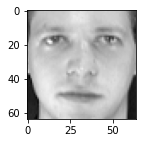

In [5]:
img = faces['images'][0]
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray)

In [6]:
n_sample = 60
Xn = faces['images'][:n_sample]
Xn.shape

(60, 64, 64)

In [7]:
X = Xn.reshape(n_sample, -1)
X.shape

(60, 4096)

In [8]:
y = faces['target'][:n_sample]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train.shape, X_test.shape

((45, 4096), (15, 4096))

In [11]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

In [12]:
y_pred = model.predict(X_test)
y_pred[:]

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [13]:
y_test[:]

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
print('Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score 0.8667


In [16]:
class_names = ['Alex', 'Cala', 'Dana', 'Eva', 'Fox']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Alex       0.75      1.00      0.86         3
        Cala       1.00      1.00      1.00         3
        Dana       1.00      0.75      0.86         4
         Eva       1.00      0.75      0.86         4
         Fox       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15



In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


In [18]:
import seaborn as sb

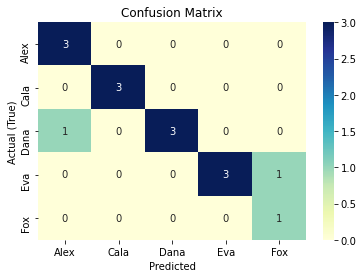

In [19]:
ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5, 4
plt.rcParams.update({'font.size': 10})

sb.heatmap(cm, annot=True, ax=ax, cmap='YlGnBu')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual (True)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [20]:
import numpy as np

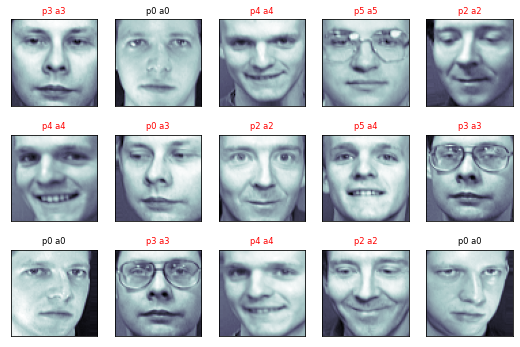

In [21]:
fig = plt.figure(figsize=(9, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    color = ('black' if y_pred[1] == y_test[i] else 'red')
    title = 'p{} a{}'.format(y_pred[i], y_test[i])
    ax.set_title(title, fontsize='small', color=color)

In [22]:
import cv2

In [23]:
img = cv2.imread('test.jpg')
print(img.shape)

(1106, 1268, 3)


In [24]:
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]

In [26]:
# cv2.imshow('image', red)
# cv2.waitKey(-1)
# cv2.destroyAllWindows()

In [27]:
#workshop 8

In [28]:
import cv2

In [29]:
source = 0
cap = cv2.VideoCapture(source)
if cap is None or not cap.isOpened():
    print('Could not open vdo source', source)
else:
    print('Vdo source OK ->', source)
    cap.release()

Vdo source OK -> 0


In [30]:
# cap = cv2.VideoCapture(0)
# cap.set(3, 640)
# cap.set(4, 480)

# if cap.isOpened() == False:
#     print('Could not open VDO source')

# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == True:
#         cv2.imshow('Mywindow', frame)
#         if cv2.waitKey(3) & 0xFF == ord('q'):
#             break
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()

In [34]:
import cv2

scale = 0.5
image_file = 'aics_fr_img2.jpg'

casc_file = 'haarcascade_frontalface_default.xml'

frontal_face = cv2.CascadeClassifier(casc_file)

image = cv2.imread(image_file)

image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bBoxes = frontal_face.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

print('Found {} faces'.format(len(bBoxes)))

for (x, y, w, h) in bBoxes:
    cv2.rectangle(image, (x, y), (x+h, y+h), (0, 255,0), 2)

cv2.imshow('MyWin', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

Found 3 faces


-1

In [38]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 420)
cap.set(4, 280)

casc_file = 'haarcascade_frontalface_default.xml'

frontal_face = cv2.CascadeClassifier(casc_file)

if not cap.isOpened():
    print('Could not open the camera')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        bBoxes = frontal_face.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
        
        for (x, y, w, h) in bBoxes:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        cv2.imshow('MyWin', frame)
        if cv2.waitKey(3) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1